# Data Sources
* Country Happiness Index: 
    * http://worldhappiness.report/
* World Health Data: 
    * https://www.kaggle.com/theworldbank/health-nutrition-and-population-statistics
* Centers for Disease Control and Prevention
    * https://www.kaggle.com/cdcdata/health-care-accesscoverage-for-19952010


In [4]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from ggplot import *
#plt.style.use('ggplot')

In [10]:
happy_data = pd.read_csv('world_happy_data.csv')
happy_data.shape

(1274, 27)

In [12]:
happy_data.head(5)

,﻿WP5 Country,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-13","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
0,Afghanistan,Afghanistan,2008,3.723590,7.197130,0.450662,47.550438,0.718114,0.183399,0.881686,...,NaN,NaN,0.476129,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,Afghanistan,2009,4.401778,7.362664,0.552308,47.859673,0.678896,0.204900,0.850035,...,NaN,NaN,0.440242,0.286315,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,Afghanistan,2010,4.758381,7.416260,0.539075,48.159512,0.600127,0.138773,0.706766,...,NaN,NaN,0.326761,0.275833,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Afghanistan,2011,3.831719,7.445761,0.521104,48.451160,0.495901,0.176339,0.731109,...,NaN,NaN,0.342830,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Afghanistan,2012,3.782938,7.549241,0.520637,48.738346,0.530935,0.247900,0.775620,...,NaN,NaN,0.312081,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
happy = pd.read_csv('happiness.csv')
happy.shape
#happy.describe()

(157, 5)

In [16]:
happy.head(10)

,country,code,happiness,health,life
0,Japan,JPN,5.921,4.706717e+11,83.59
1,Spain,ESP,6.361,1.236415e+11,83.08
2,Switzerland,CHE,7.509,7.865363e+10,82.85
3,Italy,ITA,5.977,1.980128e+11,82.69
4,Singapore,SGP,6.739,1.515589e+10,82.65
5,France,FRA,6.478,3.264751e+11,82.37
6,Australia,AUS,7.313,1.400353e+11,82.25
7,Luxembourg,LUX,6.871,4.467499e+09,82.21
8,Israel,ISR,7.267,2.375480e+10,82.15
9,Iceland,ISL,7.501,1.509256e+09,82.06


In [28]:
happy.life.fillna(happy.life.mean(), inplace=True)
happy.isnull().sum()

country       0
code         19
happiness     0
health       22
life          0
dtype: int64

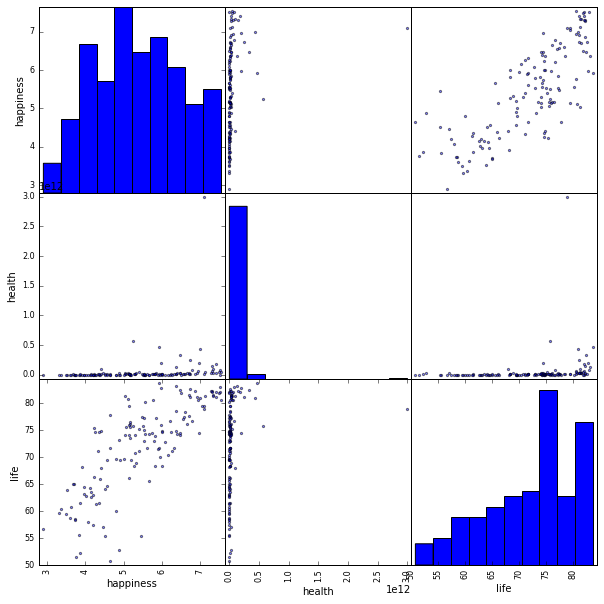

In [17]:
pd.scatter_matrix(happy, figsize=(10,10))
plt.savefig('Scatter_matrix.png')

In [18]:
ggplot(happy, aes(x='life')) + geom_density()
#ggplot(happy, aes(x='happiness')) + geom_density()
#ggplot(happy, aes(x='health')) + geom_density()

NameError: name 'ggplot' is not defined

In [20]:
! pip install seaborn

  Running setup.py bdist_wheel for seaborn: started
  Running setup.py bdist_wheel for seaborn: finished with status 'done'
  Stored in directory: C:\Users\Harry Peppitt\AppData\Local\pip\Cache\wheels\cb\c8\67\83d615c0ef9b529558525aa521025b183de8c5b156799b091e
Successfully built seaborn


You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

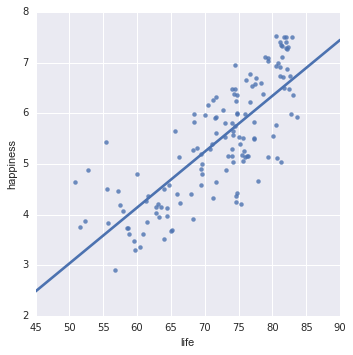

In [25]:
sns.lmplot(x='life', y='happiness', data=happy, ci=None)
plt.savefig('Regression.png')

In [29]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
feature_cols = ['life']
X = happy[feature_cols]
y = happy.happiness
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
print linreg.intercept_
print linreg.coef_

-2.53624608974
[ 0.11033076]


In [37]:
print linreg.predict(50)
print linreg.predict(60)
print linreg.predict(70)
print linreg.predict(80)
print linreg.predict(90)
print linreg.predict(100)

[ 2.98029202]
[ 4.08359964]
[ 5.18690726]
[ 6.29021488]
[ 7.3935225]
[ 8.49683012]


In [36]:
#life expectancy in AUS 82.25
print linreg.predict(82.25)

[ 6.5384591]
